In [39]:
#http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data
import pandas as pd
import numpy as np
from IPython.display import display
df_wine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data')
#print df_wine
#print df_wine.shape
df_wine.columns = [
'Class Label',
'Alcohol',
'Malic acid',
'Ash',
'Alcalinity of ash',  
'Magnesium',
'Total phenols',
'Flavanoids',
'Nonflavanoid phenols',
'Proanthocyanins',
'Color intensity',
'Hue',
'OD280/OD315 of diluted wines',
'Proline',]
display(
df_wine.head(),
df_wine['Class Label'].unique())

,Class Label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


array([1, 2, 3], dtype=int64)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X,y = df_wine.iloc[:,1:], df_wine.iloc[:,0]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
sc = StandardScaler()
#對原始數據標準化
x_train_std = sc.fit_transform(X_train)
x_test_std = sc.fit_transform(X_test)

#Co-variance
cov_mat = np.cov(x_train_std.T)

#Eigen-value,vector
eigen_val, eigen_vecs = np.linalg.eig(cov_mat) 

cov_mat = np.cov(x_train_std)
#print x_train_std
print ('Eigenvalues: \n', eigen_val)
print ('Eigenvectors: \n', eigen_vecs)



Eigenvalues: 
 [ 4.8083  2.6037  1.3709  0.8973  0.8942  0.615   0.5243  0.0999  0.364
  0.1628  0.3035  0.2365  0.2261]
Eigenvectors: 
 [[ 0.1176 -0.4845 -0.2268  0.2217 -0.0658  0.2968  0.0779 -0.0272 -0.4189
   0.2747 -0.3407 -0.3701  0.2182]
 [-0.2713 -0.2254  0.0915 -0.0505  0.4231  0.5144 -0.551  -0.0046 -0.0791
  -0.1424  0.018   0.1616 -0.2541]
 [-0.0029 -0.3785  0.5661  0.1806 -0.2155  0.0617  0.1038  0.1508  0.2343
   0.0024  0.3695 -0.4018 -0.2589]
 [-0.2188 -0.0042  0.6695 -0.0126  0.076  -0.0685  0.2309 -0.1101 -0.4467
   0.091  -0.1243  0.3575  0.277 ]
 [ 0.1138 -0.2983  0.1477 -0.7507 -0.3196 -0.1362 -0.2878 -0.0423  0.1084
  -0.0356 -0.2873 -0.0517  0.0956]
 [ 0.3884 -0.084   0.155   0.1467  0.2209 -0.0378  0.0357  0.4316  0.3058
   0.3384 -0.4473  0.319  -0.2211]
 [ 0.418  -0.0357  0.147   0.1125  0.193  -0.0043  0.0437 -0.8171  0.1523
  -0.0943 -0.1355 -0.0335 -0.1769]
 [-0.3078 -0.0553  0.0714  0.4978 -0.1451 -0.4046 -0.5167 -0.0989  0.2269
  -0.0168 -0.2618 -0.0493 

In [13]:
tot = sum(eigen_val)
var_exp = [(i/tot) for i in sorted(eigen_val,reverse=True)]
cum_var_exp = np.cumsum(var_exp)

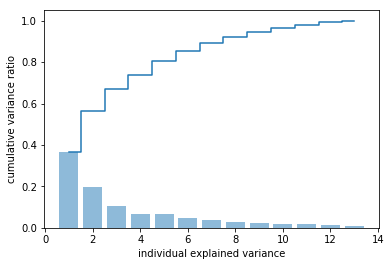

In [14]:
import matplotlib.pyplot as plt
plt.bar(range(1,14), var_exp, alpha=0.5, align='center',label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid', label='cumulative variance ratio')
plt.ylabel('cumulative variance ratio')
plt.xlabel('individual explained variance')
plt.show()

In [16]:
#特徵轉換
eigen_pairs = [(np.abs(eigen_val[i]), eigen_vecs[:,i]) for i in range(len(eigen_val))]
#print eigen_pairs
eigen_pairs.sort(reverse=True)
#eigen_paris = sorted(eigen_pairs,reverse=True)

#映射矩陣w......
w = np.hstack((eigen_pairs[0][1][:,np.newaxis],eigen_pairs[1][1][:,np.newaxis]))

print (w)

[[ 0.1176 -0.4845]
 [-0.2713 -0.2254]
 [-0.0029 -0.3785]
 [-0.2188 -0.0042]
 [ 0.1138 -0.2983]
 [ 0.3884 -0.084 ]
 [ 0.418  -0.0357]
 [-0.3078 -0.0553]
 [ 0.3189 -0.0347]
 [-0.0996 -0.5134]
 [ 0.3168  0.2155]
 [ 0.3827  0.1349]
 [ 0.2703 -0.3761]]


In [23]:
x = np.arange(0,2,0.5)
valeu = 2*x

for i in range(len(valeu)):
    if valeu[i] <= 0.6:
        print ("this works")
    else:   
        print ("valeur is too high")

this works
valeur is too high
valeur is too high
valeur is too high


### LDA
- 線性判別分析壓縮無監督數據

In [243]:
import numpy as np
np.set_printoptions(precision=4)
mean_vec = []
for label in range(1,4):
    mean_vec.append(np.mean(x_train_std[label==y_train],axis=0))
    print ('MV of Class Label %s:%s \n'%(label,mean_vec[label-1]))

MV of Class Label 1:[ 0.9378 -0.315   0.4122 -0.7469  0.4418  0.8602  0.9525 -0.5553  0.5883
  0.2441  0.5306  0.7983  1.1974] 

MV of Class Label 2:[-0.8581 -0.4025 -0.5427  0.1785 -0.3325 -0.0059  0.0816 -0.1085  0.095
 -0.8547  0.3863  0.2486 -0.6721] 

MV of Class Label 3:[ 0.1861  0.9532  0.3254  0.5943 -0.0178 -0.978  -1.2126  0.7965 -0.8146
  0.977  -1.1766 -1.2813 -0.3851] 



In [245]:
#number of features
d = 13
#Scatter Matrix
#within-class scatter matrix
#類內散佈矩陣
S_W = np.zeros((d,d))
for label,mv in zip(range(1,4),mean_vec):
    class_scatter = np.zeros((d,d))
    for row in x_train_std[y_train==label]:
        row,mv = row.reshape(d,1), mv.reshape(d,1)
        #print (mv)
        class_scatter += (row - mv).dot((row - mv).T)
        #Scaled within-class scatter matrix
        class_scatter_scale = np.cov(x_train_std[y_train==label].T)
    S_W += class_scatter

In [246]:
print ("within-class scatter matrix %sX%s" %(S_W.shape[0], S_W.shape[1]))

print ("Scaled within-class scatter matrix %sX%s" %(S_W.shape[0], S_W.shape[1]))

within-class scatter matrix 13X13
Scaled within-class scatter matrix 13X13


In [259]:
#類間散佈矩陣
#Between-class scatter matrix
mean_overall = np.mean(x_train_std, axis=0)
d = 13
S_B = np.zeros((d,d))
for i,mean_ve in enumerate(mean_vec):
    n = np.array(X_train)[y_train == i+1, : ].shape[0]
    #print (mean_ve.shape)
    #mean_ve = mean_ve.reshape(d,1)
    #print (mean_overall.shape)
    mean_ve = mean_ve.reshape(d, 1)  # make column vector
    mean_overall = mean_overall.reshape(d,1) # make column vector
    #print (mean_overall.shape)
    S_B += n*(mean_ve - mean_overall).dot((mean_ve - mean_overall).T)
print ("Between-class scatter matrix: %sX%s" %(S_B.shape[0],S_B.shape[1]))


Between-class scatter matrix: 13X13


Solve the generalized eigenvalue problem for the matrix $S_W^{-1}S_B$:

In [270]:
eigen_vals,eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
print (len(eigen_vals))

13


In [271]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in decreasing order:

9.15455252755
3.77944759561
7.49141139098e-16
7.49141139098e-16
7.32747720368e-16
5.98684115001e-16
5.98684115001e-16
5.14496669157e-16
5.14496669157e-16
4.4408920985e-16
2.15075527015e-16
2.15075527015e-16
1.22130314447e-17


### sklearn 實現 PCA LDA KPCA

In [141]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import PCA

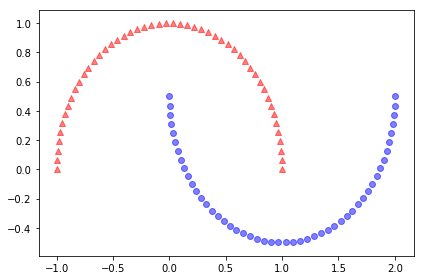

In [118]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.5)

plt.tight_layout()
# plt.savefig('./figures/half_moon_1.png', dpi=300)
plt.show()

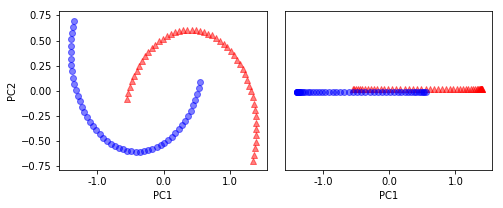

In [140]:
from matplotlib.ticker import FormatStrFormatter

x_kpca = KernelPCA(gamma=15, n_components=2,kernel='linear')
x_pca = PCA(n_components=2)
X_kpca = x_pca.fit_transform(X)

fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(7,3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], 
            color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
            color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_kpca[y==0, 0], np.zeros((50,1))+0.02, 
            color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50,1))-0.02,
            color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
ax[0].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

plt.tight_layout()
# plt.savefig('./figures/half_moon_3.png', dpi=300)
plt.show()